# IMDB Dataset
- 리뷰 텍스트를 기반으로 영화 리뷰를 긍정, 부정으로 분류.
- 데이터는 전처리가 되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음. 각 숫자는 사전에 있는 고유 단어

In [1]:
import numpy as np

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) #using frequent 10000 words

Using TensorFlow backend.


In [3]:
print('train data shape : ', train_data.shape)
print('test data shape : ', test_data.shape)

train data shape :  (25000,)
test data shape :  (25000,)


In [4]:
np.unique(train_data[0])

array([   1,    2,    4,    5,    6,    7,    8,    9,   12,   13,   14,
         15,   16,   17,   18,   19,   21,   22,   25,   26,   28,   30,
         32,   33,   35,   36,   38,   39,   43,   46,   48,   50,   51,
         52,   56,   62,   65,   66,   71,   76,   77,   82,   87,   88,
         92,   98,  100,  103,  104,  106,  107,  112,  113,  117,  124,
        130,  134,  135,  141,  144,  147,  150,  167,  172,  173,  178,
        192,  194,  215,  224,  226,  256,  283,  284,  297,  316,  317,
        336,  381,  385,  386,  400,  407,  447,  458,  469,  476,  480,
        515,  530,  546,  619,  626,  670,  723,  838,  973, 1029, 1111,
       1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785,
       3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486])

In [5]:
#1 : positive / 0 : negative
print('train labels : ', np.unique(train_labels))
print('test labels : ', np.unique(test_labels))

train labels :  [0 1]
test labels :  [0 1]


In [6]:
max([max(sequence) for sequence in train_data])

9999

# prepare dataset
- integer sequence to binary matrix

In [7]:
#one-hot encoding

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension)) #총 10000개의 단어를 사용하므로 그 단어를 사용하면 1로
    
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
print('train data shape : ', train_data.shape)
print('test data shape : ', test_data.shape)

train data shape :  (25000,)
test data shape :  (25000,)


In [10]:
print(x_train[0])
print(len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


In [11]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

# modeling

output = relu(dot(W, input) + b)

![image](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

## activation function이 왜 필요한가?

- relu와 같은 활성화 함수는 non-linearity(비선형성) 함수이다.
- 활성화 함수가 없다면, Dense층은 결국 선형적인 연산과 덥셈으로 이루어진다.
- 선형 변환만을 학습한다면, 가설 공간을 확장하지 못 하고, 매우 많은 제약이 따른다.
- 선형 층을 깊게 싸하아도 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다.

- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 은닉 노드를 둘 것인가?

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) #return probability

- 확률 예측시에는 crossentropy가 최선

In [13]:
#1
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
#2
#setting optimizer manually
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
from keras import losses
from keras import metrics

#3
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

# train-validation

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

#512개의 샘플씨기 미니 배치를 만들어 20번씩 에포크 동안 훈련
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])

In [20]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

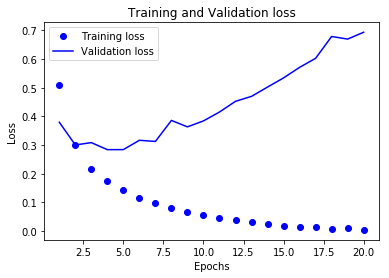

In [21]:
plt.plot(epochs, loss, 'bo', label = 'Training loss') #'bo' : blue point
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') #'b'blue line
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

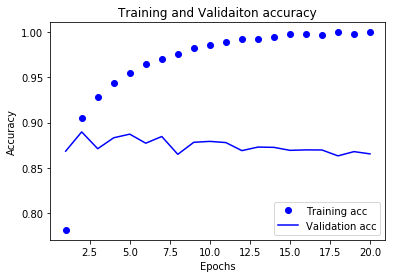

In [22]:
plt.clf() #그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

overfitting

In [23]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2165 - acc: 0.9462
Epoch 2/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.1400 - acc: 0.9585
Epoch 3/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.1095 - acc: 0.9673
Epoch 4/4
25000/25000 [==============================] - 1s 42us/step


In [24]:
#accuracy 85.824%
results

[0.4965037039756775, 0.85824]

In [25]:
model.predict(x_test)

array([[0.01501701],
       [0.99999905],
       [0.99707854],
       ...,
       [0.19372922],
       [0.10453503],
       [0.7252362 ]], dtype=float32)

- evaluate : true y까지 준비되어 있는 validation set에서
- predict : true_y를 모르는 오로지 predict를 위한 

# additional experiments
## 1 hidden layers

In [26]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 1s 40us/step


[0.2789422688579559, 0.8888]

## more unit layers

In [29]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.4158 - acc: 0.8301
Epoch 2/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.2493 - acc: 0.9137
Epoch 3/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.1996 - acc: 0.9291
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


[0.29431748281955716, 0.88276]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.4256 - acc: 0.8076
Epoch 2/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.2404 - acc: 0.9079
Epoch 3/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.1848 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step


[0.3352577354335785, 0.87308]

## other loss function

In [31]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.1465 - acc: 0.8239
Epoch 2/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.0778 - acc: 0.9119
Epoch 3/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.0586 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 1s 38us/step


[0.08588658217906951, 0.88432]

# using tanh activation function

In [32]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.4380 - acc: 0.8318
Epoch 2/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.2400 - acc: 0.9128
Epoch 3/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.1793 - acc: 0.9332
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


[0.3375771720314026, 0.87356]